# 1. CNN from scratch without Image Augmentation

https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

In [1]:
import os,shutil,math,scipy,cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from IPython.display import display 
from PIL import Image

Using TensorFlow backend.


In [2]:
def redo_kreas_category(arr):
    redo=[]
    for i in arr:
        redo.append(list(i).index(1))
    return redo

- Get Data

In [3]:
lists=os.listdir(os.getcwd()+'/Images')
lists.remove( '.DS_Store')

In [4]:
cur_dir = os.path.dirname(os.path.realpath(os.getcwd()))
paths=cur_dir+'/Project/Images/'

print(cur_dir)
print(paths)

/home/bengikoseoglu
/home/bengikoseoglu/Project/Images/


In [5]:
true_labels = []
#imgsize=224
imgsize=100
#result_array = np.zeros((20580, imgsize, imgsize, 3))
result_array = np.zeros((20580, imgsize, imgsize, 3))
cur_dir = os.path.dirname(os.path.realpath(os.getcwd()))
paths=cur_dir+'/Project/Images/'
# we have 20580 images


j=0
for i in lists:
    images=os.listdir(paths+i)
    label=i[10:]
    for k in images:
        img = cv2.imread(paths+i+'/'+k,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        true_labels.append(label)
        result_array[j,:,:,:]=np.array(img)
        j=j+1

In [6]:
result_array.shape

(20580, 100, 100, 3)

In [17]:
len(true_labels)

20580

In [18]:
len(np.unique(np.array(true_labels)))

120

- Scaling

Each image is of size 224 x 224 and has three channels for red, green, and blue (RGB), hence giving each image the (224, 224, 3) dimensions. We will now scale each image with pixel values between (0, 255) to values between (0, 1) because deep learning models work really well with small input values.


In [8]:
resultarray_scaled = result_array.astype('float32')
resultarray_scaled = resultarray_scaled/255

In [9]:
result_array[0]

array([[[ 53., 120., 153.],
        [ 33.,  97., 132.],
        [ 27.,  86., 125.],
        ...,
        [ 65.,  84.,  57.],
        [ 66.,  85.,  58.],
        [ 72.,  94.,  58.]],

       [[  0.,  93., 155.],
        [  0.,  89., 154.],
        [  0.,  91., 157.],
        ...,
        [ 63.,  86.,  54.],
        [ 87., 109.,  80.],
        [ 90., 112.,  83.]],

       [[  1., 110., 164.],
        [  2., 114., 169.],
        [  3., 118., 174.],
        ...,
        [102., 131.,  92.],
        [107., 133., 101.],
        [ 60.,  82.,  62.]],

       ...,

       [[119., 172., 192.],
        [109., 162., 183.],
        [115., 167., 190.],
        ...,
        [210., 236., 248.],
        [170., 214., 238.],
        [126., 175., 196.]],

       [[102., 159., 181.],
        [105., 161., 185.],
        [ 94., 149., 176.],
        ...,
        [198., 225., 237.],
        [143., 185., 209.],
        [183., 232., 250.]],

       [[ 86., 140., 164.],
        [111., 162., 194.],
        [ 90., 1

In [10]:
resultarray_scaled[0]

array([[[0.20784314, 0.47058824, 0.6       ],
        [0.12941177, 0.38039216, 0.5176471 ],
        [0.10588235, 0.3372549 , 0.49019608],
        ...,
        [0.25490198, 0.32941177, 0.22352941],
        [0.25882354, 0.33333334, 0.22745098],
        [0.28235295, 0.36862746, 0.22745098]],

       [[0.        , 0.3647059 , 0.60784316],
        [0.        , 0.34901962, 0.6039216 ],
        [0.        , 0.35686275, 0.6156863 ],
        ...,
        [0.24705882, 0.3372549 , 0.21176471],
        [0.34117648, 0.42745098, 0.3137255 ],
        [0.3529412 , 0.4392157 , 0.3254902 ]],

       [[0.00392157, 0.43137255, 0.6431373 ],
        [0.00784314, 0.44705883, 0.6627451 ],
        [0.01176471, 0.4627451 , 0.68235296],
        ...,
        [0.4       , 0.5137255 , 0.36078432],
        [0.41960785, 0.52156866, 0.39607844],
        [0.23529412, 0.32156864, 0.24313726]],

       ...,

       [[0.46666667, 0.6745098 , 0.7529412 ],
        [0.42745098, 0.63529414, 0.7176471 ],
        [0.4509804 , 0

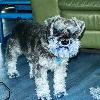

In [13]:
array_to_img(result_array[0])

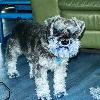

In [11]:
array_to_img(resultarray_scaled[0])

- Train test split & encode y labels

In [14]:
le = LabelEncoder()
le.fit(true_labels)
all_labels_enc = le.transform(true_labels)
all_labels_enc = to_categorical(all_labels_enc,len(np.array(np.unique(true_labels))))

print(true_labels[0:10], all_labels_enc[0:10])

['miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer', 'miniature_schnauzer'] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
X = resultarray_scaled

X_train, X_test, y_train, y_test = train_test_split(X,all_labels_enc,test_size=0.2,random_state=69)
X_train, X_val, y_train, y_val  = train_test_split(X_train,y_train,test_size=0.2,random_state=69)

- Modeling

In [27]:
batch_size = 100 #number of images passed to the operation in every iteration
num_classes = len(np.array(np.unique(true_labels))) # target class
epochs = 10   #number of times the entire dataset has gone through the neural network
input_shape = (imgsize, imgsize, 3)

In [28]:
model = Sequential()

# Conv2D= filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the 
# convolution). Kernel size is your filter size. 

# maxpooling = pool_size: Integer, size of the max pooling windows.

# flatten = Flattens the input. Does not affect the batch size. If the batch size is (batch, ) then this 
# will become (batch,1). Flatten flattens the output, 

# Dense = fully connected layer. takes input and output arrays of shape (*, 32)



model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
# dense layer, output should be the same as 
model.add(Dense(len(np.array(np.unique(true_labels))), activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 64)        9280      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
__________

In [29]:
history = model.fit(x=X_train, y=y_train,
                    validation_data=(X_val, y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 13171 samples, validate on 3293 samples
Epoch 1/10
13171/13171 [==============================] - 181s 14ms/step - loss: 4.7340 - acc: 0.0204 - val_loss: 4.4895 - val_acc: 0.0495
Epoch 2/10
13171/13171 [==============================] - 181s 14ms/step - loss: 4.3452 - acc: 0.0580 - val_loss: 4.2949 - val_acc: 0.0659
Epoch 3/10
13171/13171 [==============================] - 181s 14ms/step - loss: 3.9003 - acc: 0.1210 - val_loss: 4.3822 - val_acc: 0.0729
Epoch 4/10
13171/13171 [==============================] - 181s 14ms/step - loss: 3.1386 - acc: 0.2656 - val_loss: 4.5482 - val_acc: 0.0914
Epoch 5/10
13171/13171 [==============================] - 181s 14ms/step - loss: 2.0535 - acc: 0.4948 - val_loss: 5.5928 - val_acc: 0.0747
Epoch 6/10
13171/13171 [==============================] - 181s 14ms/step - loss: 1.0276 - acc: 0.7381 - val_loss: 6.8096 - val_acc: 0.0708
Epoch 7/10
13171/13171 [==============================] - 181s 14ms/step - loss: 0.4455 - acc: 0.8868 - val_loss: 8.1

In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [31]:
history.validation_data

[array([[[[0.03921569, 0.32941177, 0.2784314 ],
          [0.20392157, 0.45882353, 0.42352942],
          [0.19215687, 0.38431373, 0.39215687],
          ...,
          [0.1882353 , 0.5019608 , 0.39607844],
          [0.14117648, 0.40784314, 0.3019608 ],
          [0.18039216, 0.38039216, 0.28627452]],
 
         [[0.12156863, 0.39607844, 0.3529412 ],
          [0.09019608, 0.33333334, 0.3137255 ],
          [0.13333334, 0.3254902 , 0.3372549 ],
          ...,
          [0.22352941, 0.48235294, 0.38431373],
          [0.10980392, 0.34901962, 0.24705882],
          [0.16470589, 0.3529412 , 0.25882354]],
 
         [[0.07058824, 0.32156864, 0.29803923],
          [0.07058824, 0.29803923, 0.29411766],
          [0.15686275, 0.3529412 , 0.38039216],
          ...,
          [0.14901961, 0.34901962, 0.25882354],
          [0.13725491, 0.3254902 , 0.23137255],
          [0.18431373, 0.3647059 , 0.27450982]],
 
         ...,
 
         [[0.12941177, 0.40392157, 0.3019608 ],
          [0.16078

In [32]:
history.history['acc']

[0.02042365770793506,
 0.058006225550770264,
 0.12102346084873368,
 0.2655834786016354,
 0.49479917724034245,
 0.7381368168900455,
 0.8867967490563042,
 0.9482195745132822,
 0.9588489934511295,
 0.9666692041136139]

- See accuracy in test dataset & double check other accuracies

In [33]:
# test
y_test_model = model.predict_classes(X_test)
y_test_model_prob=model.predict_proba(X_test)
print(y_test_model_prob.shape)
y_test_true_flat=redo_kreas_category(y_test)
print(np.unique(y_test_model))
print(accuracy_score(y_test_model, y_test_true_flat))

(4116, 120)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
0.07653061224489796


In [34]:
# validation
y_val_model = model.predict_classes(X_val)
y_val_model_prob=model.predict_proba(X_val)
print(y_val_model_prob.shape)
y_val_true_flat=redo_kreas_category(y_val)
print(np.unique(y_val_model))
print(accuracy_score(y_val_model, y_val_true_flat))

(3293, 120)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119]
0.06771940479805648


In [35]:
# train
y_train_model = model.predict_classes(X_train)
y_train_model_prob=model.predict_proba(X_train)
print(y_train_model_prob.shape)
y_train_true_flat=redo_kreas_category(y_train)
print(np.unique(y_train_model))
print(accuracy_score(y_train_model, y_train_true_flat))

(13171, 120)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
0.9757041986181763


- Graphs

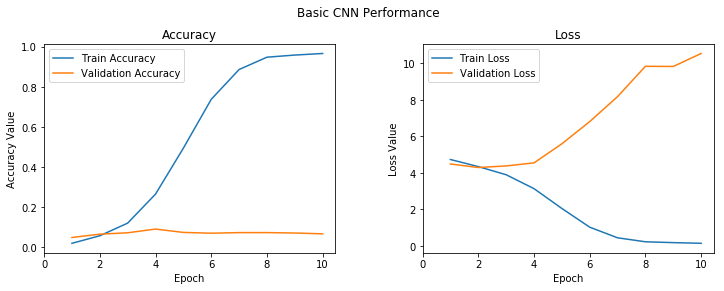

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

> It is very much overfitting